### PAGA

PAGA for pseudotime + trajectories for RNA data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

## Load data

### AnnData Obj (Seurat -> AnnData through sceasy)

In [3]:
rna = sc.read_h5ad("../20200828_RNA_Seurat/sessions/20200913_n27632/seurat.h5ad")

In [4]:
rna

AnnData object with n_obs × n_vars = 59369 × 27632
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'selected', 'percent.or', 'RNA_snn_res.1', 'seurat_clusters', 'RNA_snn_res.0.5'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'

### Cluster Config

In [5]:
cluster_config = pd.read_csv("../../figures_factory/configs/cluster.tsv", sep='\t')
cluster_config

,cluster,colour,description,new_cluster
0,1,#F4D5CD,Intermediate,12
1,2,#78A824,Pre-iPSC,15
2,3,#F01D35,Fibroblast-like,5
3,4,#E85F6D,Fibroblast-like,3
4,5,#B03743,Fibroblast,1
5,6,#7C2730,Fibroblast,2
6,7,#CF175A,Fibroblast-like,4
7,8,#CCCCCC,Doublets,17
8,9,#F7A6C2,Keratinocyte-like,6
9,10,#A6D854,Pre-iPSC,16


### ATAC Transfer Labels

In [6]:
atac_rna_label = pd.read_csv("../20200828_RNA_Seurat/sessions/20200913_n27632/atac.20200520_n68916.cluster.transfer.tsv", sep='\t')

print(all(atac_rna_label['barcode']==rna.obs.index)) 

# transfer to new cluster idxs
atac_rna_label['atac_new_cluster'] = list(cluster_config.iloc[atac_rna_label['atac_cluster']-1]["new_cluster"])

atac_rna_label.head()

True


,barcode,sample,atac_cluster,atac_new_cluster
0,AAACCCAAGAGTGACC-1,D0,5,1
1,AAACCCAAGTGCCAGA-1,D0,5,1
2,AAACCCACACCATTCC-1,D0,6,2
3,AAACCCACACGCGTCA-1,D0,5,1
4,AAACCCAGTCCATAGT-1,D0,6,2


In [7]:
atac_rna_label["atac_new_cluster"]

0         1
1         1
2         2
3         1
4         2
         ..
59364    15
59365    15
59366     5
59367    16
59368    16
Name: atac_new_cluster, Length: 59369, dtype: int64

In [8]:
rna.obs["atac_transfer_cluster"] = list([str(x) for x in atac_rna_label["atac_new_cluster"]])

In [9]:
rna.obs

,nCount_RNA,nFeature_RNA,sample,percent.mt,selected,percent.or,RNA_snn_res.1,seurat_clusters,RNA_snn_res.0.5,atac_transfer_cluster
AAACCCAAGAGTGACC-1,12431.0,3300,D0,4.231357,0.0,0.0,0,0,0,1
AAACCCAAGTGCCAGA-1,11132.0,3304,D0,5.821056,1.0,0.0,0,0,0,1
AAACCCACACCATTCC-1,13101.0,3788,D0,4.121823,0.0,0.0,7,0,0,2
AAACCCACACGCGTCA-1,7944.0,2612,D0,4.770896,1.0,0.0,0,0,0,1
AAACCCAGTCCATAGT-1,10934.0,3080,D0,6.036217,0.0,0.0,7,0,0,2
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCCTGGTG-8,11675.0,3241,D14,13.678801,0.0,0.0,8,7,7,15
TTTGTTGGTCGTTATG-8,19498.0,4105,D14,6.385270,0.0,0.0,8,7,7,15
TTTGTTGGTCTGTCAA-8,9651.0,3197,D14,6.652160,0.0,0.0,11,12,12,5
TTTGTTGTCCCTGGTT-8,18084.0,4037,D14,7.039372,0.0,0.0,1,10,10,16


In [10]:
# TEMP (Remove cell states not present in RNA)
rna = rna[~rna.obs['atac_transfer_cluster'].isin(['8', '10', '17'])].copy()

In [11]:
rna.obs

,nCount_RNA,nFeature_RNA,sample,percent.mt,selected,percent.or,RNA_snn_res.1,seurat_clusters,RNA_snn_res.0.5,atac_transfer_cluster
AAACCCAAGAGTGACC-1,12431.0,3300,D0,4.231357,0.0,0.0,0,0,0,1
AAACCCAAGTGCCAGA-1,11132.0,3304,D0,5.821056,1.0,0.0,0,0,0,1
AAACCCACACCATTCC-1,13101.0,3788,D0,4.121823,0.0,0.0,7,0,0,2
AAACCCACACGCGTCA-1,7944.0,2612,D0,4.770896,1.0,0.0,0,0,0,1
AAACCCAGTCCATAGT-1,10934.0,3080,D0,6.036217,0.0,0.0,7,0,0,2
...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCCTGGTG-8,11675.0,3241,D14,13.678801,0.0,0.0,8,7,7,15
TTTGTTGGTCGTTATG-8,19498.0,4105,D14,6.385270,0.0,0.0,8,7,7,15
TTTGTTGGTCTGTCAA-8,9651.0,3197,D14,6.652160,0.0,0.0,11,12,12,5
TTTGTTGTCCCTGGTT-8,18084.0,4037,D14,7.039372,0.0,0.0,1,10,10,16


... storing 'atac_transfer_cluster' as categorical


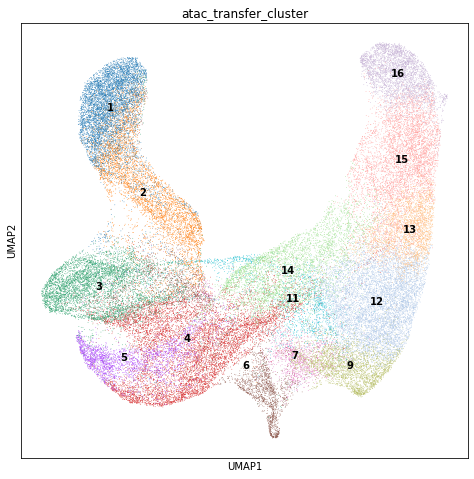

In [12]:
rcParams['figure.figsize'] = 8, 8

sc.pl.umap(rna, color="atac_transfer_cluster", legend_loc='on data')

## Trajectory

In [13]:
sc.pp.neighbors(rna, n_neighbors=15, n_pcs=30)

In [14]:
sc.tl.paga(rna, groups='atac_transfer_cluster')

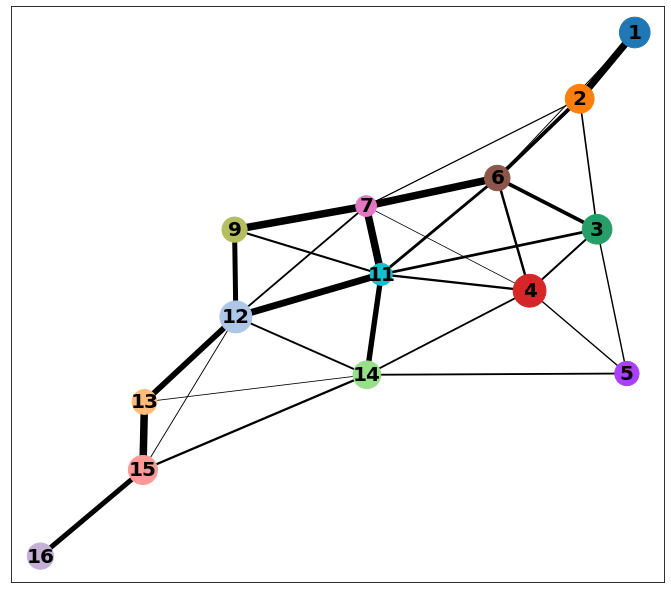

In [56]:
rcParams['figure.figsize'] = 10, 10

sc.pl.paga(rna, 
           threshold=.1, 
           fontsize=20, 
           node_size_scale=5,
#            solid_edges='connectivities_tree',
           show=True)

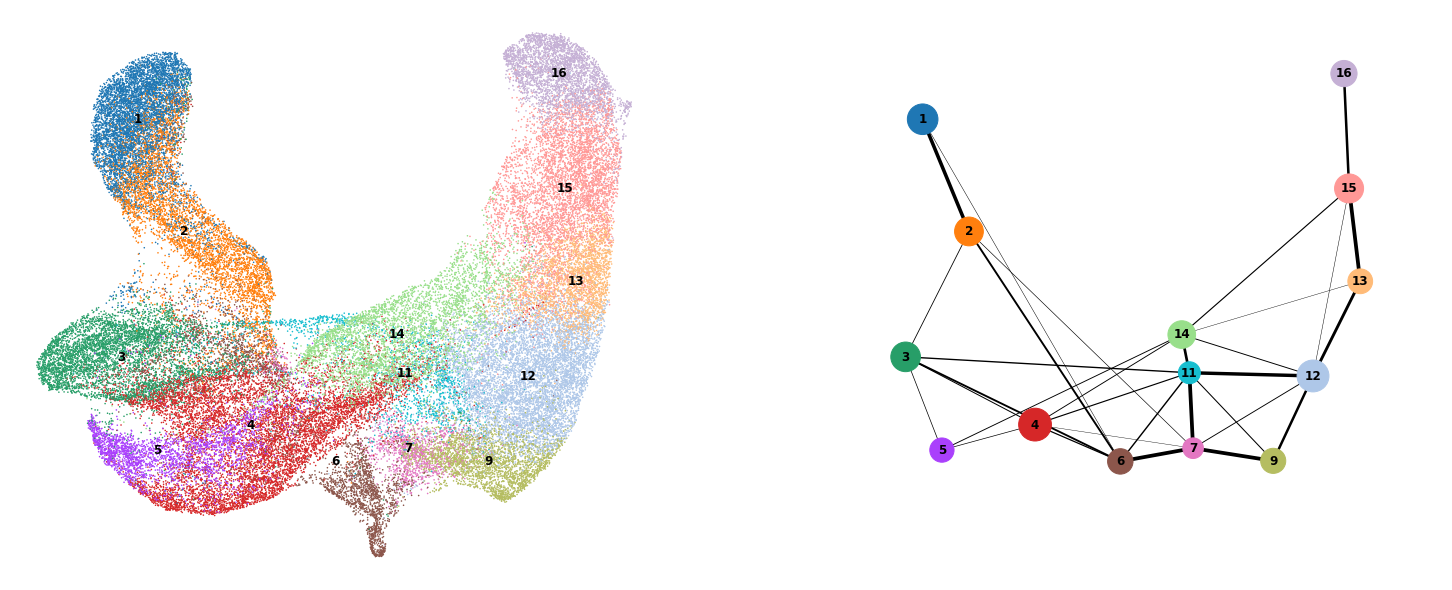

In [39]:
sc.pl.paga_compare(
    rna, threshold=0.1, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, frameon=False, edges=False, save=True,
    fontsize=20, 
    node_size_scale=5)

### Pseudotime

In [41]:
rna.uns['iroot'] = np.flatnonzero(rna.obs['atac_transfer_cluster']  == '1')[0]
rna.uns['iroot']

0

In [42]:
sc.tl.dpt(rna)

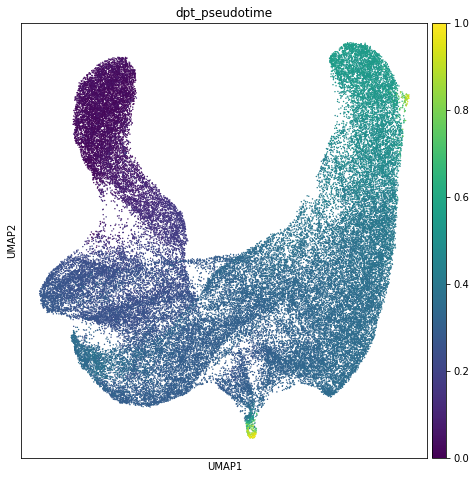

In [51]:
rcParams['figure.figsize'] = 8, 8

sc.pl.umap(rna, color=['dpt_pseudotime'], 
           size=8, 
           legend_loc='on data')